In [21]:
import pandas as pd
import os

directory = '/Users/preci/Downloads/drive-download-20240911T195755Z-001'
file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.csv')]

expected_columns = ['Nickname', 'Defender Score', 'Attacker Score', 'Time (sec)', 'Winner', 'Level']
dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path, header=None)

    if df.empty:
        continue

    processed_rows = []
    for _, row in df.iterrows():
        if isinstance(row.iloc[0], str) and ';' in row.iloc[0]:
            split_row = row.iloc[0].split(';')
            if len(split_row) == len(expected_columns):
                processed_rows.append(split_row)
        else:
            if not all(row.values == expected_columns) and not row.isin(expected_columns).all():  # Check against both conditions
                processed_rows.append(row.tolist())

    df = pd.DataFrame(processed_rows, columns=expected_columns)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

output_path = '/Users/preci/Documents/inf 791/Compileddataset/merged_dataset.csv'
merged_df.to_csv(output_path, index=False)

print(f"Merged file saved to: {output_path}")


Merged file saved to: /Users/preci/Documents/inf 791/Compileddataset/merged_dataset.csv


In [22]:
import pandas as pd

output_path = '/Users/preci/Documents/inf 791/Compileddataset/merged_dataset.csv'
merged_df = pd.read_csv(output_path)

merged_df.drop_duplicates(inplace=True)
merged_df.dropna(inplace=True)

cleaned_output_path = '/Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv'
merged_df.to_csv(cleaned_output_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_output_path}")


Cleaned dataset saved to: /Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv


In [23]:
import pandas as pd

output_path = '/Users/preci/Documents/inf 791/Compileddataset/merged_dataset.csv'
merged_df = pd.read_csv(output_path)

merged_df.drop_duplicates(inplace=True)
merged_df.dropna(inplace=True)

merged_df = merged_df[~merged_df.isin(['Nickname', 'Defender Score', 'Attacker Score', 'Time (sec)', 'Winner', 'Level']).any(axis=1)]

cleaned_output_path = '/Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv'
merged_df.to_csv(cleaned_output_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_output_path}")


Cleaned dataset saved to: /Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv


In [24]:
import pandas as pd

file_path = '/Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv'
df = pd.read_csv(file_path)

print("Basic Information:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nUnique Value Counts:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

print("\nData Types:")
print(df.dtypes)

if 'Winner' in df.columns:
    print("\nWinner Count:")
    print(df['Winner'].value_counts())

if 'Nickname' in df.columns:
    print("\nNickname Count:")
    print(df['Nickname'].value_counts())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nickname        1287 non-null   object
 1   Defender Score  1287 non-null   int64 
 2   Attacker Score  1287 non-null   int64 
 3   Time (sec)      1287 non-null   int64 
 4   Winner          1287 non-null   object
 5   Level           1287 non-null   object
dtypes: int64(3), object(3)
memory usage: 60.5+ KB
None

First 5 Rows:
  Nickname  Defender Score  Attacker Score  Time (sec)    Winner   Level
0  johndoe               7               6         157  Defender  Expert
1  johndoe               8               5         112  Defender  Expert
2  johndoe               9               4          98  Defender  Expert
3  johndoe               9               4          89  Defender  Expert
4  johndoe               8               5          88  Defender  Expert

Summary Stati

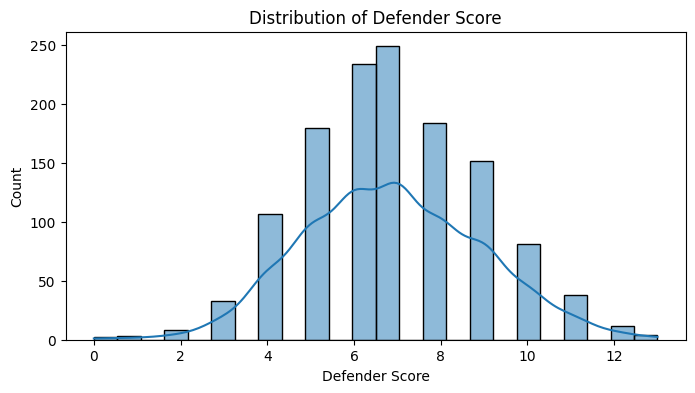

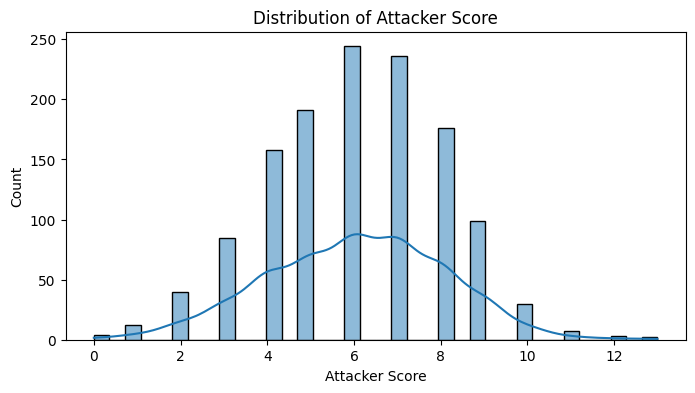

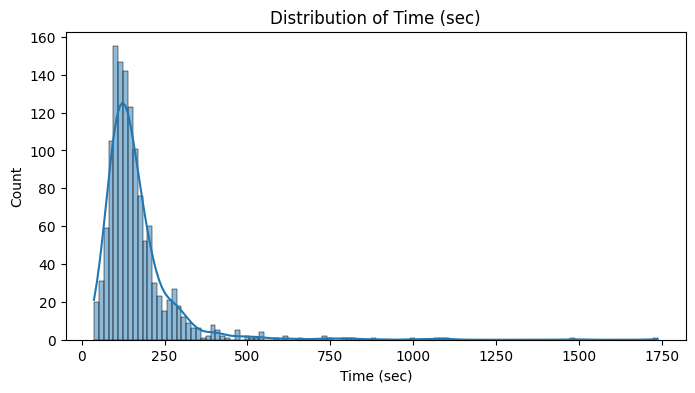

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv'
df = pd.read_csv(file_path)

numerical_columns = ['Defender Score', 'Attacker Score', 'Time (sec)']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


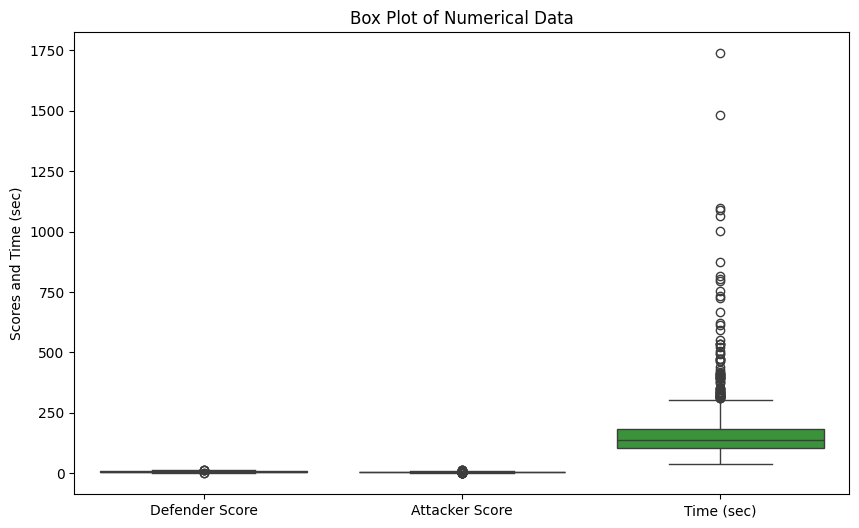

In [4]:
#Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Data')
plt.ylabel('Scores and Time (sec)')
plt.show()


In [ ]:
# Bar plot for categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Winner')
plt.title('Count of Winners')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Level')
plt.title('Count of Levels')
plt.ylabel('Count')
plt.show()


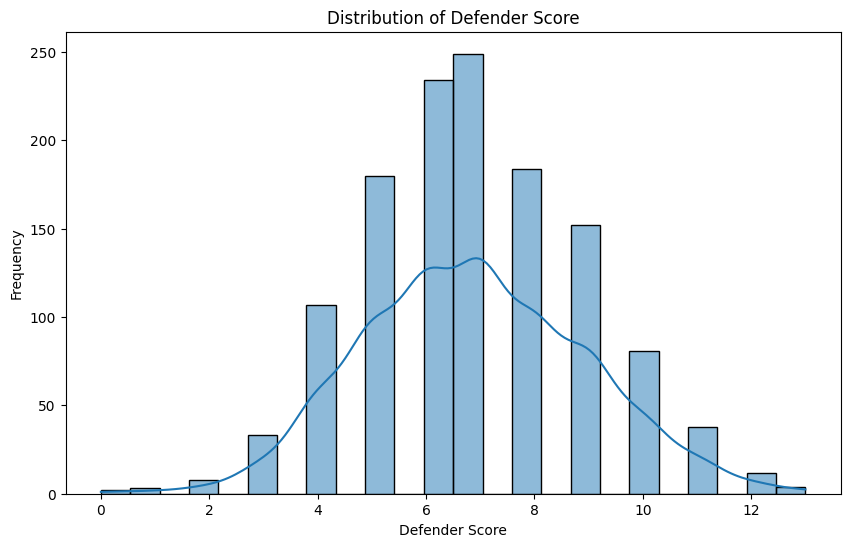

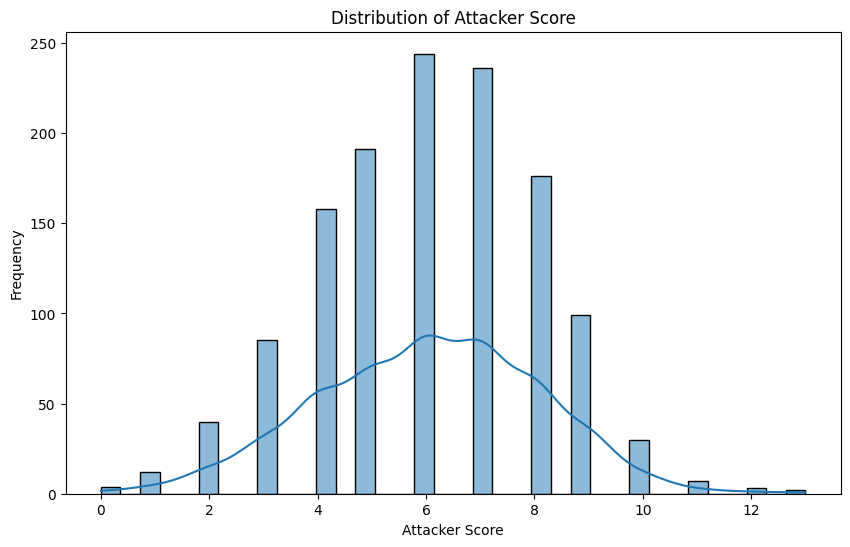

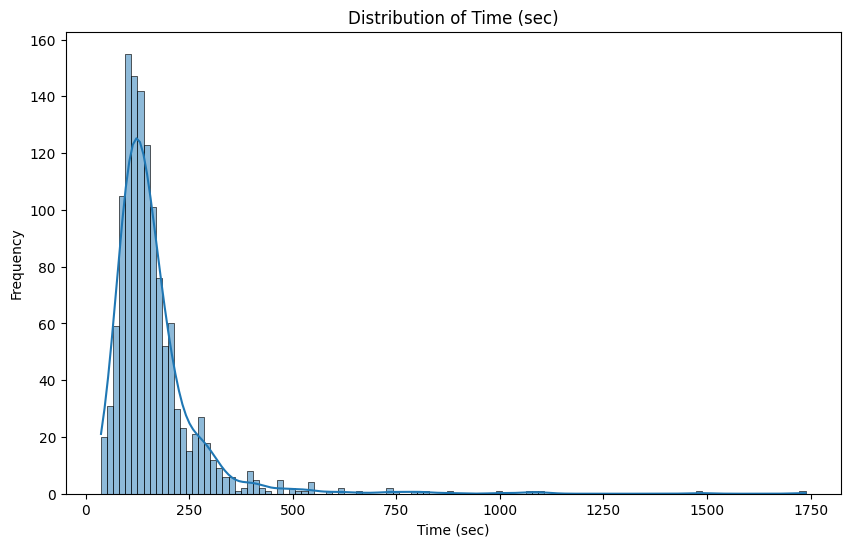

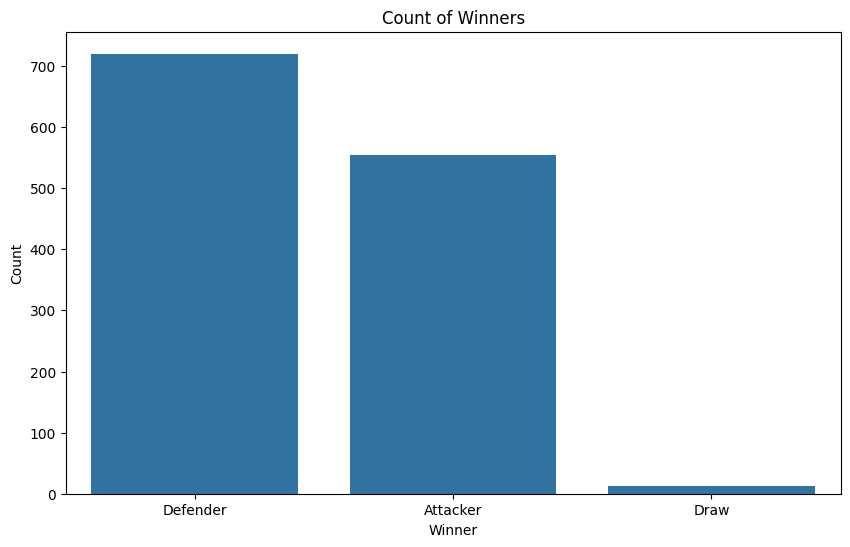

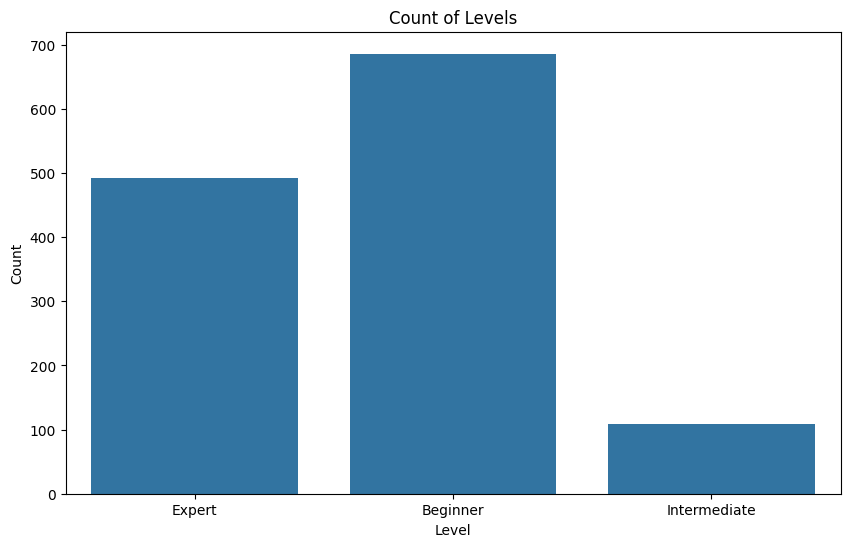

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv'
df = pd.read_csv(file_path)

numerical_columns = ['Defender Score', 'Attacker Score', 'Time (sec)']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'/Users/preci/Documents/inf 791/Compileddataset/histogram_{col}.png')  
    plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Winner')
plt.title('Count of Winners')
plt.ylabel('Count')
plt.savefig('/Users/preci/Documents/inf 791/Compileddataset/BarPlot_winners.png') 
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Level')
plt.title('Count of Levels')
plt.ylabel('Count')
plt.savefig('/Users/preci/Documents/inf 791/Compileddataset/BarPlot_levels.png')  
plt.show()


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv'
df = pd.read_csv(file_path)

numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('/Users/preci/Documents/inf 791/Compileddataset/correlation_matrix.png')
plt.close()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/preci/Documents/inf 791/Compileddataset/cleaned_dataset.csv'
df = pd.read_csv(file_path)

X = df.drop('Winner', axis=1)
y = df['Winner']

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.columns))

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

stacking_model = StackingClassifier(estimators=[('rf', rf_model), ('nb', nb_model), ('svm', svm_model)])
stacking_model.fit(X_train, y_train)
stacking_predictions = stacking_model.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Defender', 'Attacker', 'Draw'], yticklabels=['Defender', 'Attacker', 'Draw'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/Users/preci/Documents/inf 791/Compileddataset/models/confusion_matrix_rf.png')
plt.close()

nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Defender', 'Attacker', 'Draw'], yticklabels=['Defender', 'Attacker', 'Draw'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/Users/preci/Documents/inf 791/Compileddataset/models/confusion_matrix_nb.png')
plt.close()

svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Defender', 'Attacker', 'Draw'], yticklabels=['Defender', 'Attacker', 'Draw'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/Users/preci/Documents/inf 791/Compileddataset/models/confusion_matrix_svm.png')
plt.close()

stacking_conf_matrix = confusion_matrix(y_test, stacking_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(stacking_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Defender', 'Attacker', 'Draw'], yticklabels=['Defender', 'Attacker', 'Draw'])
plt.title('Confusion Matrix for Stacking Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/Users/preci/Documents/inf 791/Compileddataset/models/confusion_matrix_stacking.png')
plt.close()

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_predictions))

print("Random Forest Precision:", precision_score(y_test, rf_predictions, average='weighted'))
print("Naive Bayes Precision:", precision_score(y_test, nb_predictions, average='weighted'))
print("SVM Precision:", precision_score(y_test, svm_predictions, average='weighted'))
print("Stacking Model Precision:", precision_score(y_test, stacking_predictions, average='weighted'))

print("Random Forest Recall:", recall_score(y_test, rf_predictions, average='weighted'))
print("Naive Bayes Recall:", recall_score(y_test, nb_predictions, average='weighted'))
print("SVM Recall:", recall_score(y_test, svm_predictions, average='weighted'))
print("Stacking Model Recall:", recall_score(y_test, stacking_predictions, average='weighted'))


Random Forest Accuracy: 1.0
Naive Bayes Accuracy: 0.9922480620155039
SVM Accuracy: 1.0
Stacking Model Accuracy: 1.0
Random Forest Precision: 1.0
Naive Bayes Precision: 0.9923620611035111
SVM Precision: 1.0
Stacking Model Precision: 1.0
Random Forest Recall: 1.0
Naive Bayes Recall: 0.9922480620155039
SVM Recall: 1.0
Stacking Model Recall: 1.0


In [9]:
import pandas as pd

print("Column names in the dataframe:")
print(df.columns)

if 'level' in df.columns:
    level_counts = df['level'].value_counts()
    print("Level counts:")
    print(level_counts)
else:
    print("'level' column not found. Please check the column name.")


Column names in the dataframe:
Index(['Nickname', 'Defender Score', 'Attacker Score', 'Time (sec)', 'Winner',
       'Level'],
      dtype='object')
'level' column not found. Please check the column name.


In [10]:
import pandas as pd

print("Column names in the dataframe:")
print(df.columns)

if 'Level' in df.columns:
    level_counts = df['Level'].value_counts()
    print("Level counts:")
    print(level_counts)
else:
    print("'Level' column not found. Please check the column name.")


Column names in the dataframe:
Index(['Nickname', 'Defender Score', 'Attacker Score', 'Time (sec)', 'Winner',
       'Level'],
      dtype='object')
Level counts:
Level
Beginner        686
Expert          493
Intermediate    108
Name: count, dtype: int64
